# Lecture 4: Runge–Kutta methods.

Recalling our analysis of Euler's method, it is clear that we could obtain a higher order method if our recurrence for generating the $y_i$'s agreed with more terms of the Taylor series for $y_*$, the true solution to the ODE that passes through the point $(x_i, y_i)$.
The **Runge–Kutta methods** are a family of numerical methods which generalize both the methods of Euler and Heun.
As with Heun's method, the essence of the idea is to use additional terms of the Taylor series without actually computing the higher order derivatives and instead replacing each with some finite difference approximation.
The Runge-Kutta method of order $1$ is Euler's method. Heun's modified Euler method is an example of an order $2$ Runge–Kutta method.

## Order two methods.

The generic Runge-Kutta method of order 2 takes the form
\begin{equation}
y_{i+1} = y_i + h\big(w_1k_1 + w_2k_2\big),
\end{equation}
where
\begin{align}
k_1 &= f(x_i, y_i),\\
k_2 &= f(x_i+\alpha h, y_i + \beta hk_1),\\
w_1 &=\frac{1}{2\alpha},\\
w_2 &=\frac{1}{2\beta},\\
w_1+w_2 &=1,\\
\end{align}
***TODO: Insert proof that this family has order 2.***

Any choice of parameters $\alpha, \beta, w_1, w_2$ satisfying the above constraints yields a valid order $2$ method.
We mention the three most common choices here.
Setting $w_1=w_2=1/2$ and $\alpha=\beta=1$ yields Heun's (modified Euler) method which we have already met. 
**Ralston's order 2 method**, which also occasionally goes by the name "Heun's method," arises by setting $w_1=1/4$, $w_2=3/4$, and $\alpha=\beta=2/3$.
Finally, the **midpoint method** (or **corrected Euler method**) is defined by the choices $w_1=0$, $w_2=1$, and  $\alpha=\beta=1/2$.

## The classical fourth order method.

Probably the most popular Runge–Kutta method is the **classical fourth order Runge–Kutta method** (**RK4**), which is defined by the equations
\begin{equation}
y_{i+1} = \frac{h}{6}\big(k_1 + 2k_2 + 2k_3 + k_4\big),
\end{equation}
where
\begin{align}
k_1 &= f(x_i, y_i),\\
k_2 &= f\big(x_i + h/2, y_i + hk_1/2\big),\\
k_3 &= f\big(x_i + h/2, y_i + hk_2/2\big),\\
k_4 &= f(x_i + h, y_i + hk_3).
\end{align}
As the name would seem to imply, RK4 is an order $4$ numerical method.

## Example.

Below we compare Euler's method with the classical Runge–Kutta method of order 4 (RK4) for the IVP 
\begin{align}
y'&=(y/x)-(y/x)^2,\\
y(1)&=1.
\end{align}

The true solution to the ODE $y'=\frac{y{\left(x \right)}}{x} + \frac{y^{2}{\left(x \right)}}{x^{2}}$ with initial condition $y(1)=1$ is $y{\left(x \right)} = \frac{x}{1 - \log{\left(x \right)}}$.

Global errors for Euler's method and RK4.
┍━━━━━┯━━━━━━━━━┯━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━━━━━━━━━━━━┑
│   i │     x_i │   e_{i,Euler} = |y(x_i)-y_i| │   e_{i,RK4} = |y(x_i)-y_i| │
┝━━━━━┿━━━━━━━━━┿━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━━━━━━━━━━━━━━┥
│   0 │ 1.00000 │                      0.00000 │                    0.00000 │
├─────┼─────────┼──────────────────────────────┼────────────────────────────┤
│   1 │ 1.10000 │                      0.01589 │                    0.00001 │
├─────┼─────────┼──────────────────────────────┼────────────────────────────┤
│   2 │ 1.20000 │                      0.03947 │                    0.00002 │
├─────┼─────────┼──────────────────────────────┼────────────────────────────┤
│   3 │ 1.30000 │                      0.07365 │                    0.00003 │
├─────┼─────────┼──────────────────────────────┼────────────────────────────┤
│   4 │ 1.40000 │                      0.12255 │                    0.00005 │
├─────┼─────────┼─────

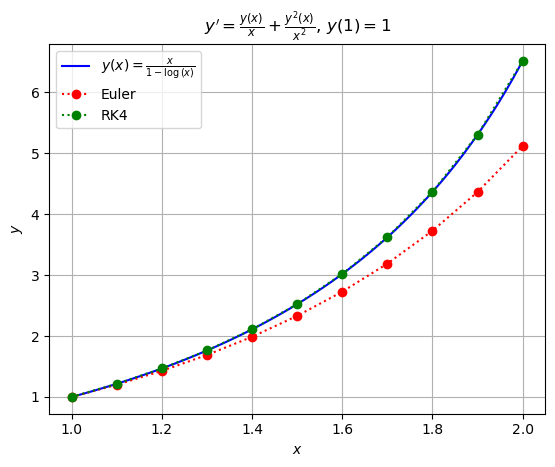

In [12]:
import math263
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from tabulate import tabulate
from IPython.display import display, Markdown

# define IVP parameters
f = lambda x, y: (y/x) + (y/x)**2;
a, b = 1, 2;
y0=1;

# solve the IVP symbolically with the sympy library
x = sp.Symbol('x');
y = sp.Function('y');
ode = sp.Eq(y(x).diff(x), f(x,y(x)));
soln=sp.dsolve(ode, y(x), ics={y(a): y0}); 
rhs=f(x,y(x));
display(Markdown(f"The true solution to the ODE $y'={sp.latex(rhs)}$ with initial condition $y({a})={y0}$ is ${sp.latex(soln)}$."))

# convert the symbolic solution to a Python function and plot it with matplotlib.pyplot
sym_y=sp.lambdify(x, soln.rhs, modules=['numpy']); 
xvals = np.linspace(a, b, num=100);
ex1=plt.figure();
plt.plot(xvals, sym_y(xvals), color='b');
plt.title(f"$y' = {sp.latex(rhs)}$, $y({a})={y0}$");
plt.xlabel(r"$x$");
plt.ylabel(r"$y$");
plt.legend([f"${sp.latex(soln)}$"], loc='upper right');
plt.grid(True)

# numerically solve the IVP with n=10 steps of forward Euler and n=10 steps of RK4
n = 10;
(x, y_euler) = math263.feuler(f, a, b, y0, n);
(x, y_rk4)   = math263.rk4(f, a, b, y0, n);

# tabulate the results
print("Global errors for Euler's method and RK4.")
table = np.transpose(np.stack((x, abs(sym_y(x)-y_euler), abs(sym_y(x)-y_rk4))));
hdrs = ["i", "x_i", "e_{i,Euler} = |y(x_i)-y_i|", "e_{i,RK4} = |y(x_i)-y_i|"];
print(tabulate(table, hdrs, tablefmt='mixed_grid', floatfmt='0.5f', showindex=True))

# plot numerical solutions on top of true solution
plt.figure(ex1);
plt.plot(x,y_euler,'ro:');
plt.plot(x,y_rk4,'go:');
plt.legend([f"${sp.latex(soln)}$","Euler", "RK4"], loc='upper left');
plt.show();